In [1]:
library(BayesFactor)
fprintf <- function(...) cat(sprintf(...))
# parameters
rscale = 0.707
nullI = c(-0.1,0.1)
filepath = './data/results'

Loading required package: coda
Loading required package: Matrix
************
Welcome to BayesFactor 0.9.12-4.2. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************


# Comparing RTs and error in the 3 response types:

## RTs

In [2]:
for (i in 1:3) {
    if (i == 1){
    name = 'm'
    exp = 'Main Experiment'
  } else if (i == 2) {
    name = 'r'
    exp = 'Replication Experiment'
    } else if (i == 3) {
    name = 'c'
    exp = 'Control Experiment'
    }
data1 = read.csv(paste(filepath, "/exp1_resp_type_rt_",name,"0.csv", sep=""), header=FALSE, sep=" ")
data2 = read.csv(paste(filepath, "/exp1_resp_type_rt_",name,"1.csv", sep=""), header=FALSE, sep=" ")
data3 = read.csv(paste(filepath, "/exp1_resp_type_rt_",name,"2.csv", sep=""), header=FALSE, sep=" ")

fprintf(exp)
fprintf('\n')
fprintf('ANOVA:')
rt <- c(data1$V1,data1$V2,data2$V2)
n <- length(data1$V1)
c <- factor(c(rep(1,n),rep(2,n),rep(3,n)))
N <- factor(c(c(1:n),c(1:n),c(1:n)))
df <- data.frame(name=N, cond=c, rt=rt)
modelAOV <- aov(rt~factor(cond)+Error(factor(name)), data = df)
print(summary(modelAOV))

bf = anovaBF(rt~cond+name, data = df,  whichRandom="name")
print(bf)

fprintf('Post-Hoc comparisons:')
print(t.test(data1$V1,data1$V2,paired=TRUE))
print(ttestBF(x=data1$V1,y=data1$V2,r=rscale,paired=TRUE))

print(t.test(data2$V1,data2$V2,paired=TRUE))
print(ttestBF(x=data2$V1,y=data2$V2,r=rscale,paired=TRUE))

print(t.test(data3$V1,data3$V2,paired=TRUE))
print(ttestBF(x=data3$V1,y=data3$V2,r=rscale,paired=TRUE))
    
fprintf('----------------------------------------------------------')
fprintf('\n')
    }

Main Experiment
ANOVA:
Error: factor(name)
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 29  3.899  0.1344               

Error: Within
             Df Sum Sq Mean Sq F value  Pr(>F)   
factor(cond)  2 0.2466 0.12331   6.195 0.00364 **
Residuals    58 1.1545 0.01991                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Bayes factor analysis
--------------
[1] cond + name : 9.904794 ±0.43%

Against denominator:
  rt ~ name 
---
Bayes factor type: BFlinearModel, JZS

Post-Hoc comparisons:
	Paired t-test

data:  data1$V1 and data1$V2
t = 3.8203, df = 29, p-value = 0.0006502
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.03562893 0.11773117
sample estimates:
mean of the differences 
             0.07668005 

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 48.50264 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS


	Paired t-test

data:  data2$V1 and data2

## Errors

In [3]:
for (i in 1:3) {
    if (i == 1){
    name = 'm'
    exp = 'Main Experiment'
  } else if (i == 2) {
    name = 'r'
    exp = 'Replication Experiment'
    } else if (i == 3) {
    name = 'c'
    exp = 'Control Experiment'
    }
data1 = read.csv(paste(filepath, "/exp1_resp_type_err_",name,"0.csv", sep=""), header=FALSE, sep=" ")
data2 = read.csv(paste(filepath, "/exp1_resp_type_err_",name,"1.csv", sep=""), header=FALSE, sep=" ")
data3 = read.csv(paste(filepath, "/exp1_resp_type_err_",name,"2.csv", sep=""), header=FALSE, sep=" ")

fprintf(exp)
fprintf('\n')
fprintf('ANOVA:')
rt <- c(data1$V1,data1$V2,data2$V2)
n <- length(data1$V1)
c <- factor(c(rep(1,n),rep(2,n),rep(3,n)))
N <- factor(c(c(1:n),c(1:n),c(1:n)))
df <- data.frame(name=N, cond=c, rt=rt)
modelAOV <- aov(rt~factor(cond)+Error(factor(name)), data = df)
print(summary(modelAOV))

bf = anovaBF(rt~cond+name, data = df,  whichRandom="name")
print(bf)

fprintf('Post-Hoc comparisons:')
print(t.test(data1$V1,data1$V2,paired=TRUE))
print(ttestBF(x=data1$V1,y=data1$V2,r=rscale,paired=TRUE))

print(t.test(data2$V1,data2$V2,paired=TRUE))
print(ttestBF(x=data2$V1,y=data2$V2,r=rscale,paired=TRUE))

print(t.test(data3$V1,data3$V2,paired=TRUE))
print(ttestBF(x=data3$V1,y=data3$V2,r=rscale,paired=TRUE))
    
fprintf('----------------------------------------------------------')
fprintf('\n')
    }

Main Experiment
ANOVA:
Error: factor(name)
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 29  1.251 0.04315               

Error: Within
             Df Sum Sq Mean Sq F value   Pr(>F)    
factor(cond)  2 0.1365 0.06825   9.262 0.000323 ***
Residuals    58 0.4274 0.00737                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Bayes factor analysis
--------------
[1] cond + name : 87.2221 ±4.32%

Against denominator:
  rt ~ name 
---
Bayes factor type: BFlinearModel, JZS

Post-Hoc comparisons:
	Paired t-test

data:  data1$V1 and data1$V2
t = 0.19716, df = 29, p-value = 0.8451
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.03417327  0.04146494
sample estimates:
mean of the differences 
            0.003645833 

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 0.1979481 ±0.01%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS


	Paired t-test

data:  data2$V1 

# Chunk-based effect

## Errors

In [4]:
for (i in 1:3) {
    if (i == 1){
    name = 'm'
    exp = 'Main Experiment'
  } else if (i == 2) {
    name = 'r'
    exp = 'Replication Experiment'
    } else if (i == 3) {
    name = 'c'
    exp = 'Control Experiment'
    }
data = read.csv(paste(filepath, "/exp1_obj_err_",name,".csv", sep=""), header=FALSE, sep=" ")

fprintf(exp)
fprintf('\n')
fprintf('Object effect blocks 1-2/4:')
fprintf('\n')
print(t.test(data$V1,mu=0))
print(ttestBF(data$V1,mu=0,r=rscale))
print(t.test(data$V2,mu=0))
print(ttestBF(data$V2,mu=0,r=rscale))
    
    if (i == 2) {
        
        print(t.test(data$V1,data$V2,paired=TRUE))
        print(ttestBF(x=data$V1,y=data$V2,r=rscale,paired=TRUE))
    } else{

print(t.test(data$V3,mu=0))
print(ttestBF(data$V3,mu=0,r=rscale))
print(t.test(data$V4,mu=0))
print(ttestBF(data$V4,mu=0,r=rscale))
        
fprintf('ANOVA:')
rt <- c(data$V1,data$V2,data$V3,data$V4)
n <- length(data$V1)
c <- factor(c(rep(1,n),rep(2,n),rep(3,n),rep(4,n)))
N <- factor(c(c(1:n),c(1:n),c(1:n),c(1:n)))
df <- data.frame(name=N, cond=c, rt=rt)
modelAOV <- aov(rt~factor(cond)+Error(factor(name)), data = df)
print(summary(modelAOV))

bf = anovaBF(rt~cond+name, data = df,  whichRandom="name")
print(bf)

fprintf('Post-Hoc comparisons:')
print(t.test(data$V1,data$V2,paired=TRUE))
print(ttestBF(x=data$V1,y=data$V2,r=rscale,paired=TRUE))

print(t.test(data$V1,data$V3,paired=TRUE))
print(ttestBF(x=data$V1,y=data$V3,r=rscale,paired=TRUE))

print(t.test(data$V1,data$V4,paired=TRUE))
print(ttestBF(x=data$V1,y=data$V4,r=rscale,paired=TRUE))
} 
fprintf('----------------------------------------------------------')
fprintf('\n')
    }

Main Experiment
Object effect blocks 1-2/4:

	One Sample t-test

data:  data$V1
t = 4.3725, df = 29, p-value = 0.0001443
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
  3.95495 10.90616
sample estimates:
mean of x 
 7.430556 

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 186.3967 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS


	One Sample t-test

data:  data$V2
t = -1.9082, df = 29, p-value = 0.06631
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -3.7407879  0.1296768
sample estimates:
mean of x 
-1.805556 

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 0.9578736 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS


	One Sample t-test

data:  data$V3
t = 0.020479, df = 29, p-value = 0.9838
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -3.432994  3.502438
sample estimates:
 mean of x 
0

## Errors Only in trials with tw true pairs

In [5]:
for (i in 1:3) {
    if (i == 1){
    name = 'm1'
    exp = 'Main Experiment'
  } else if (i == 2) {
    name = 'r1'
    exp = 'Replication Experiment'
    } else if (i == 3) {
    name = 'c1'
    exp = 'Control Experiment'
    }
data = read.csv(paste(filepath, "/exp1_obj_err_",name,".csv", sep=""), header=FALSE, sep=" ")

fprintf(exp)
fprintf('\n')
fprintf('Object effect blocks 1-2/4:')
fprintf('\n')
print(t.test(data$V1,mu=0))
print(ttestBF(data$V1,mu=0,r=rscale))
print(t.test(data$V2,mu=0))
print(ttestBF(data$V2,mu=0,r=rscale))
    
    if (i == 2) {
        
        print(t.test(data$V1,data$V2,paired=TRUE))
        print(ttestBF(x=data$V1,y=data$V2,r=rscale,paired=TRUE))
    } else{

print(t.test(data$V3,mu=0))
print(ttestBF(data$V3,mu=0,r=rscale))
print(t.test(data$V4,mu=0))
print(ttestBF(data$V4,mu=0,r=rscale))
        
fprintf('ANOVA:')
rt <- c(data$V1,data$V2,data$V3,data$V4)
n <- length(data$V1)
c <- factor(c(rep(1,n),rep(2,n),rep(3,n),rep(4,n)))
N <- factor(c(c(1:n),c(1:n),c(1:n),c(1:n)))
df <- data.frame(name=N, cond=c, rt=rt)
modelAOV <- aov(rt~factor(cond)+Error(factor(name)), data = df)
print(summary(modelAOV))

bf = anovaBF(rt~cond+name, data = df,  whichRandom="name")
print(bf)

fprintf('Post-Hoc comparisons:')
print(t.test(data$V1,data$V2,paired=TRUE))
print(ttestBF(x=data$V1,y=data$V2,r=rscale,paired=TRUE))

print(t.test(data$V1,data$V3,paired=TRUE))
print(ttestBF(x=data$V1,y=data$V3,r=rscale,paired=TRUE))

print(t.test(data$V1,data$V4,paired=TRUE))
print(ttestBF(x=data$V1,y=data$V4,r=rscale,paired=TRUE))
} 
fprintf('----------------------------------------------------------')
fprintf('\n')
    }

Main Experiment
Object effect blocks 1-2/4:

	One Sample t-test

data:  data$V1
t = 3.0286, df = 29, p-value = 0.00512
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
  2.638072 13.611928
sample estimates:
mean of x 
    8.125 

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 7.972891 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS


	One Sample t-test

data:  data$V2
t = -1.3156, df = 29, p-value = 0.1986
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -7.450895  1.617562
sample estimates:
mean of x 
-2.916667 

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 0.4244868 ±0.01%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS


	One Sample t-test

data:  data$V3
t = 0.25228, df = 29, p-value = 0.8026
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -4.441951  5.691951
sample estimates:
mean of x 
   

## RTs

In [6]:


for (i in 1:3) {
    if (i == 1){
    name = 'm'
    exp = 'Main Experiment'
  } else if (i == 2) {
    name = 'r'
    exp = 'Replication Experiment'
    } else if (i == 3) {
    name = 'c'
    exp = 'Control Experiment'
    }
data = read.csv(paste(filepath, "/exp1_obj_rt_",name,".csv", sep=""), header=FALSE, sep=" ")

fprintf(exp)
fprintf('\n')
fprintf('Object effect block 1:')
fprintf('\n')
print(t.test(data$V1,mu=0))
print(ttestBF(data$V1,mu=0,r=rscale))
print(t.test(data$V2,mu=0))
print(ttestBF(data$V2,mu=0,r=rscale))
    if (i == 2) {
        
        print(t.test(data$V1,data$V2,paired=TRUE))
        print(ttestBF(x=data$V1,y=data$V2,r=rscale,paired=TRUE))
    } else{
fprintf('ANOVA:')
rt <- c(data$V1,data$V2,data$V3,data$V4)
n <- length(data$V1)
c <- factor(c(rep(1,n),rep(2,n),rep(3,n),rep(4,n)))
N <- factor(c(c(1:n),c(1:n),c(1:n),c(1:n)))
df <- data.frame(name=N, cond=c, rt=rt)
modelAOV <- aov(rt~factor(cond)+Error(factor(name)), data = df)
print(summary(modelAOV))

bf = anovaBF(rt~cond+name, data = df,  whichRandom="name")
print(bf)

fprintf('Post-Hoc comparisons:')
print(t.test(data$V1,data$V2,paired=TRUE))
print(ttestBF(x=data$V1,y=data$V2,r=rscale,paired=TRUE))

print(t.test(data$V1,data$V3,paired=TRUE))
print(ttestBF(x=data$V1,y=data$V3,r=rscale,paired=TRUE))

print(t.test(data$V1,data$V4,paired=TRUE))
print(ttestBF(x=data$V1,y=data$V4,r=rscale,paired=TRUE))
} 
fprintf('----------------------------------------------------------')
fprintf('\n')
    }

Main Experiment
Object effect block 1:

	One Sample t-test

data:  data$V1
t = -1.4985, df = 29, p-value = 0.1448
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -153.81908   23.72958
sample estimates:
mean of x 
-65.04475 

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 0.5310837 ±0.01%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS


	One Sample t-test

data:  data$V2
t = -1.1783, df = 29, p-value = 0.2482
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -71.74402  19.29328
sample estimates:
mean of x 
-26.22537 

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 0.3649949 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS

ANOVA:
Error: factor(name)
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 29 699910   24135               

Error: Within
             Df  Sum Sq Mean Sq F value Pr(>F)
factor(cond)  3  132974   44325   2.123

# Familiarity test

In [7]:
data1 = read.csv(paste(filepath, "/exp1_fam_obj_m.csv", sep=""), header=FALSE, sep=" ")
t.test(data1$V1, mu=0.5)
ttestBF(data1$V1, mu=0.5,r=rscale)
data2 = read.csv(paste(filepath, "/exp1_fam_obj_r.csv", sep=""), header=FALSE, sep=" ")
t.test(data2$V1, mu=0.5)
ttestBF(data2$V1, mu=0.5,r=rscale)

t.test(c(data1$V1,data2$V1), mu=0.5)
ttestBF(c(data1$V1,data2$V1), mu=0.5,r=rscale)


	One Sample t-test

data:  data1$V1
t = 1.4094, df = 29, p-value = 0.1694
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4812011 0.6021323
sample estimates:
mean of x 
0.5416667 


Bayes factor analysis
--------------
[1] Alt., r=0.707 : 0.4746227 ±0.01%

Against denominator:
  Null, mu = 0.5 
---
Bayes factor type: BFoneSample, JZS



	One Sample t-test

data:  data2$V1
t = 1.3257, df = 29, p-value = 0.1953
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4728644 0.6271356
sample estimates:
mean of x 
     0.55 


Bayes factor analysis
--------------
[1] Alt., r=0.707 : 0.4294976 ±0.01%

Against denominator:
  Null, mu = 0.5 
---
Bayes factor type: BFoneSample, JZS



	One Sample t-test

data:  c(data1$V1, data2$V1)
t = 1.9288, df = 59, p-value = 0.05857
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4982838 0.5933829
sample estimates:
mean of x 
0.5458333 


Bayes factor analysis
--------------
[1] Alt., r=0.707 : 0.7969278 ±0%

Against denominator:
  Null, mu = 0.5 
---
Bayes factor type: BFoneSample, JZS


# Correlation between familiarity and CBA effect

Bayes factor analysis
--------------
[1] Alt., r=0.333 : 2.986808 ±0%

Against denominator:
  Null, rho = 0 
---
Bayes factor type: BFcorrelation, Jeffreys-beta*


Independent-candidate M-H acceptance rate: 77%


[1] 0,3224155

Bayes factor analysis
--------------
[1] Alt., r=0,333 : 3,344087 ±0%

Against denominator:
  Null, rho = 0 
---
Bayes factor type: BFcorrelation, Jeffreys-beta*


Independent-candidate M-H acceptance rate: 77%


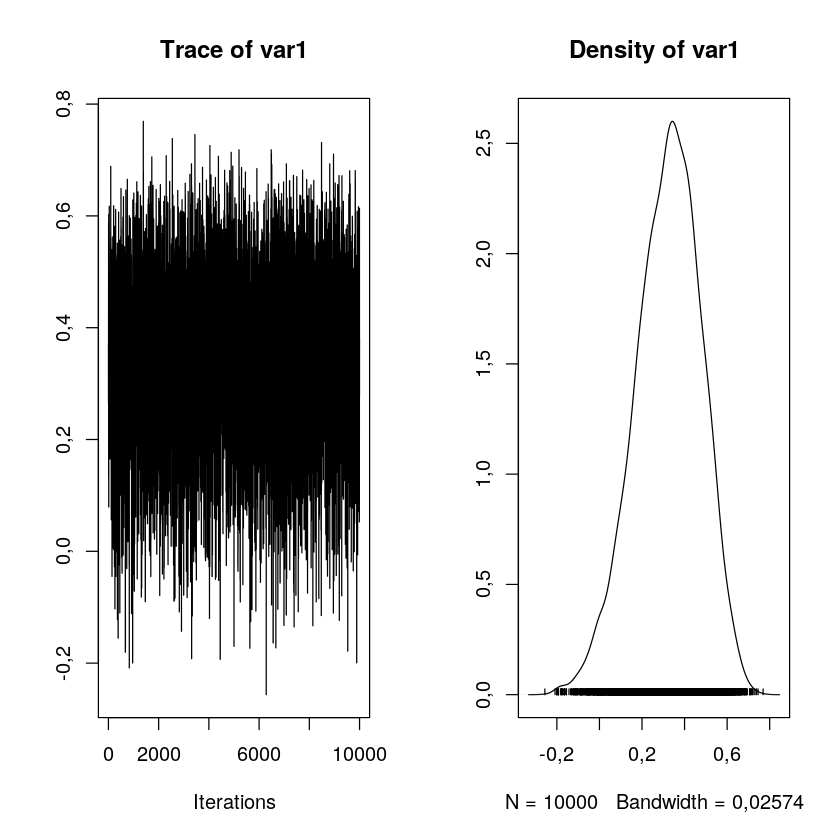

[1] 0,3326447

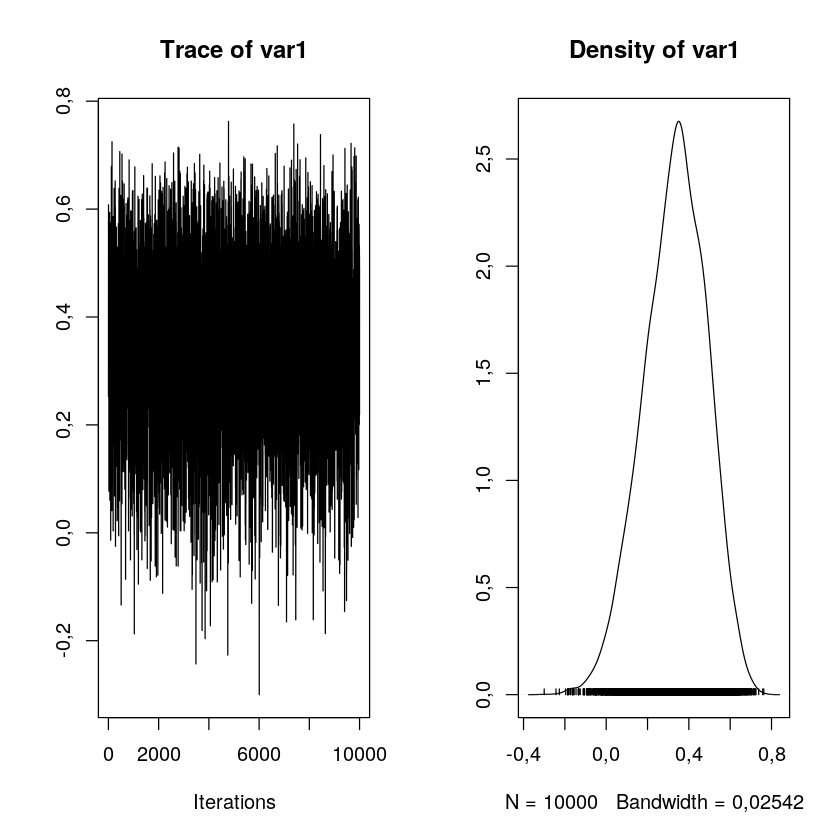

In [8]:
data1 = read.csv(paste(filepath, "/exp1_fam_obj_m.csv", sep=""), header=FALSE, sep=" ")
correlationBF(y = data1$V1, x =  data1$V2)
samples = correlationBF(y = data1$V1, x =  data1$V2,
          posterior = TRUE, iterations = 10000)
plot(samples[,"rho"])
mean(samples[,"rho"])

data2 = read.csv(paste(filepath, "/exp1_fam_obj_r.csv", sep=""), header=FALSE, sep=" ")
correlationBF(y = data2$V1, x =  data2$V2)
samples = correlationBF(y = data2$V1, x =  data2$V2,
          posterior = TRUE, iterations = 10000)
plot(samples[,"rho"])
mean(samples[,"rho"])



# Partial correlation between familiarity and CBA effect while controling for performance

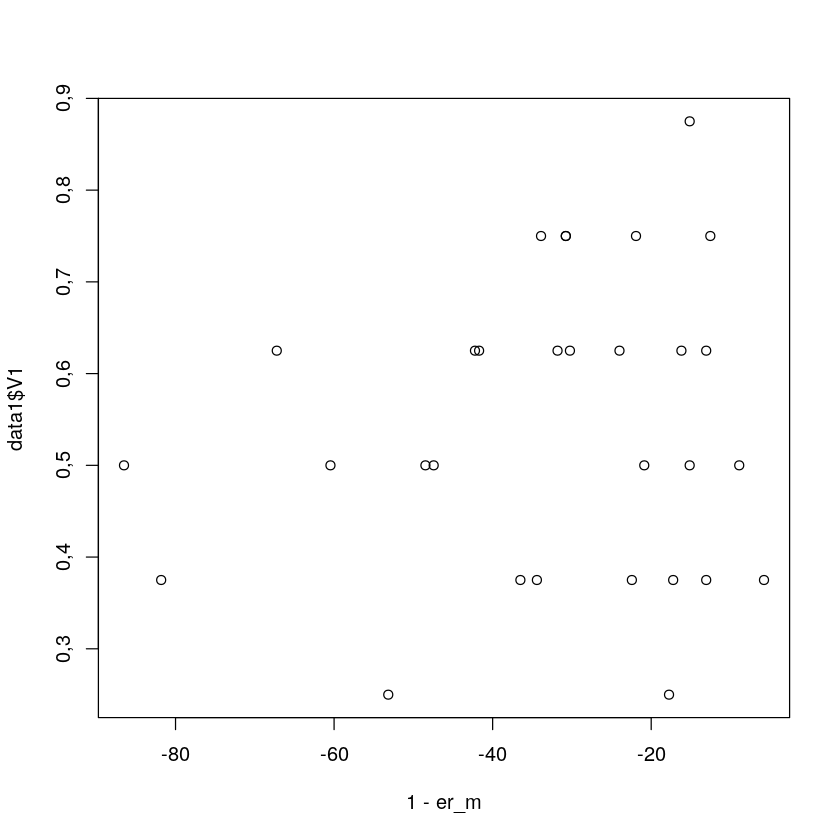


	Pearson's product-moment correlation

data:  1 - er_m and data1$V1
t = 0,73983, df = 28, p-value = 0,4656
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0,2334462  0,4750401
sample estimates:
      cor 
0,1384687 



	Pearson's product-moment correlation

data:  1 - er_m and data1$V2
t = 0,33871, df = 28, p-value = 0,7374
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0,3033717  0,4146068
sample estimates:
       cor 
0,06387919 


Bayes factor analysis
--------------
[1] Alt., r=0,333 : 0,5015373 ±0%

Against denominator:
  Null, rho = 0 
---
Bayes factor type: BFcorrelation, Jeffreys-beta*


Bayes factor analysis
--------------
[1] Alt., r=0,333 : 0,4196329 ±0%

Against denominator:
  Null, rho = 0 
---
Bayes factor type: BFcorrelation, Jeffreys-beta*


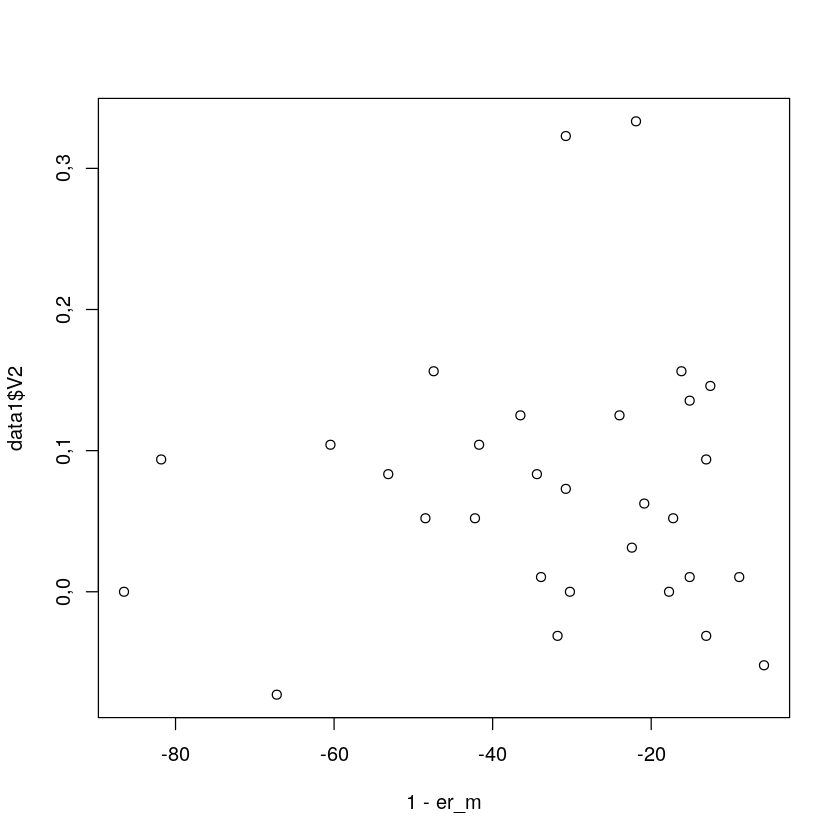

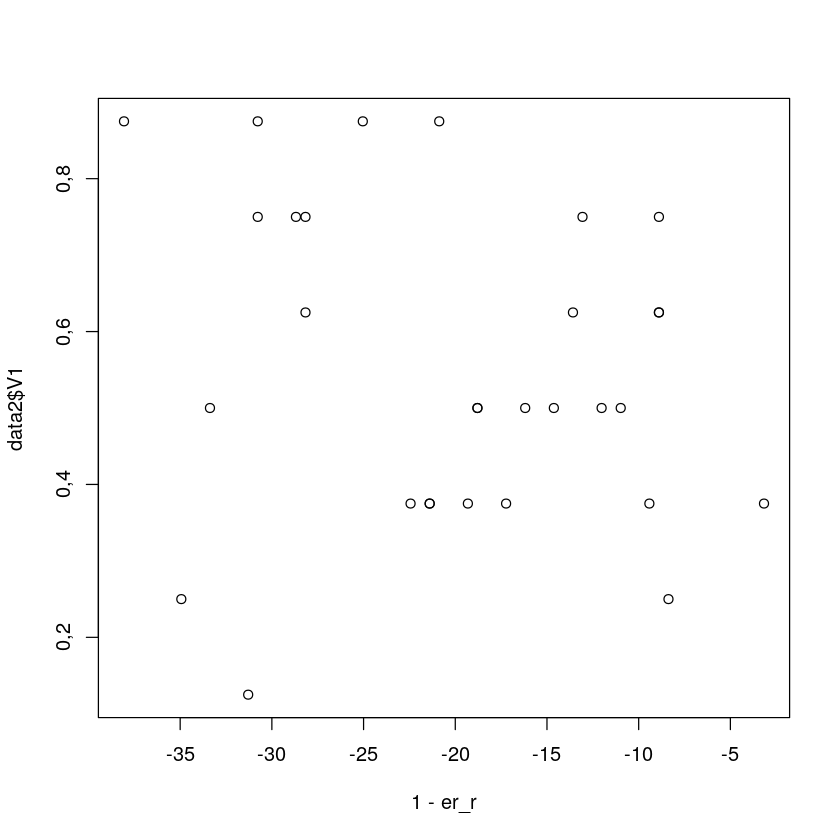


	Pearson's product-moment correlation

data:  1 - er_r and data2$V1
t = -1,0761, df = 28, p-value = 0,2911
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0,5220739  0,1734331
sample estimates:
       cor 
-0,1992882 



	Pearson's product-moment correlation

data:  1 - er_r and data2$V2
t = -1,1222, df = 28, p-value = 0,2713
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0,5282485  0,1651513
sample estimates:
       cor 
-0,2074617 


Bayes factor analysis
--------------
[1] Alt., r=0,333 : 0,6420378 ±0%

Against denominator:
  Null, rho = 0 
---
Bayes factor type: BFcorrelation, Jeffreys-beta*


Bayes factor analysis
--------------
[1] Alt., r=0,333 : 0,6685394 ±0%

Against denominator:
  Null, rho = 0 
---
Bayes factor type: BFcorrelation, Jeffreys-beta*


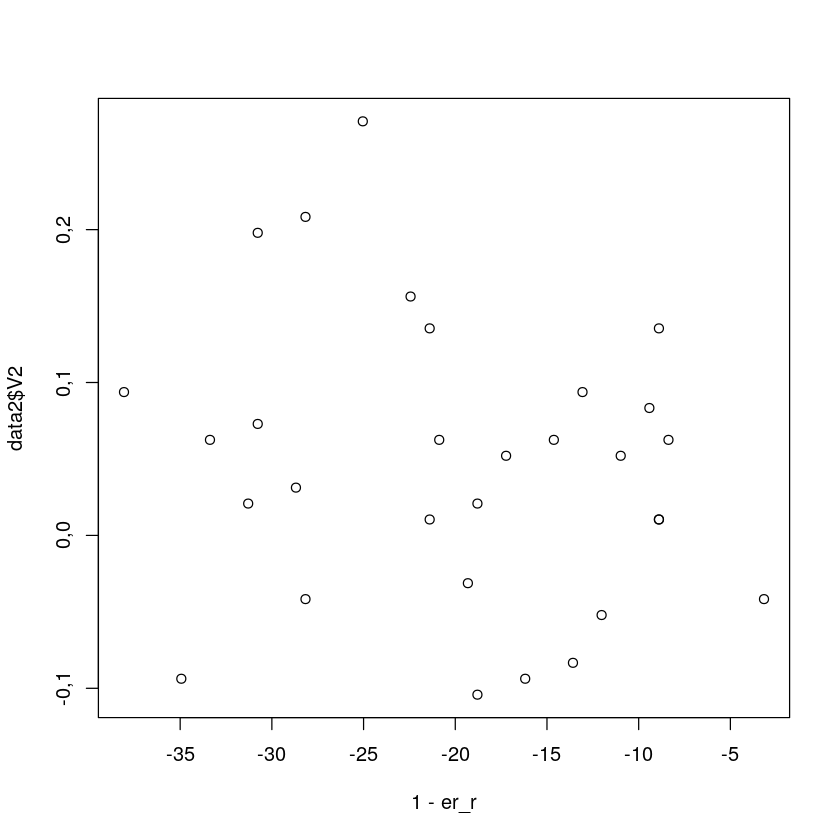

In [9]:
data3 = read.csv(paste(filepath, "/exp1_avg_err_m.csv", sep=""), header=FALSE, sep=" ")
data4 = read.csv(paste(filepath, "/exp1_avg_err_r.csv", sep=""), header=FALSE, sep=" ")
er_m=rowMeans(cbind(data3$V1,data3$V2))
er_r=rowMeans(cbind(data4$V1,data4$V2))

plot(1-er_m,data1$V1)
plot(1-er_m,data1$V2)
cor.test(1-er_m,data1$V1)
cor.test(1-er_m,data1$V2)
correlationBF(y=1-er_m, x=data1$V1)
correlationBF(y=1-er_m, x=data1$V2)

plot(1-er_r,data2$V1)
plot(1-er_r,data2$V2)
cor.test(1-er_r,data2$V1)
cor.test(1-er_r,data2$V2)
correlationBF(y=1-er_r, x=data2$V1)
correlationBF(y=1-er_r, x=data2$V2)

In [10]:
library(ppcor)
pcor.test(data1$V1,data1$V2,er_m)
pcor.test(data2$V1,data2$V2,er_r)


Loading required package: MASS


estimate,p.value,statistic,n,gp,Method
"0,3939343","0,03447783","2,227023",30,1,pearson


estimate,p.value,statistic,n,gp,Method
"0,3827888","0,04041217","2,153011",30,1,pearson


Bayes factor analysis
--------------
[1] Alt., r=0,333 : 2,851381 ±0%

Against denominator:
  Null, rho = 0 
---
Bayes factor type: BFcorrelation, Jeffreys-beta*


Independent-candidate M-H acceptance rate: 77%


[1] 0,3206071

Bayes factor analysis
--------------
[1] Alt., r=0,333 : 2,532983 ±0%

Against denominator:
  Null, rho = 0 
---
Bayes factor type: BFcorrelation, Jeffreys-beta*


Independent-candidate M-H acceptance rate: 77%


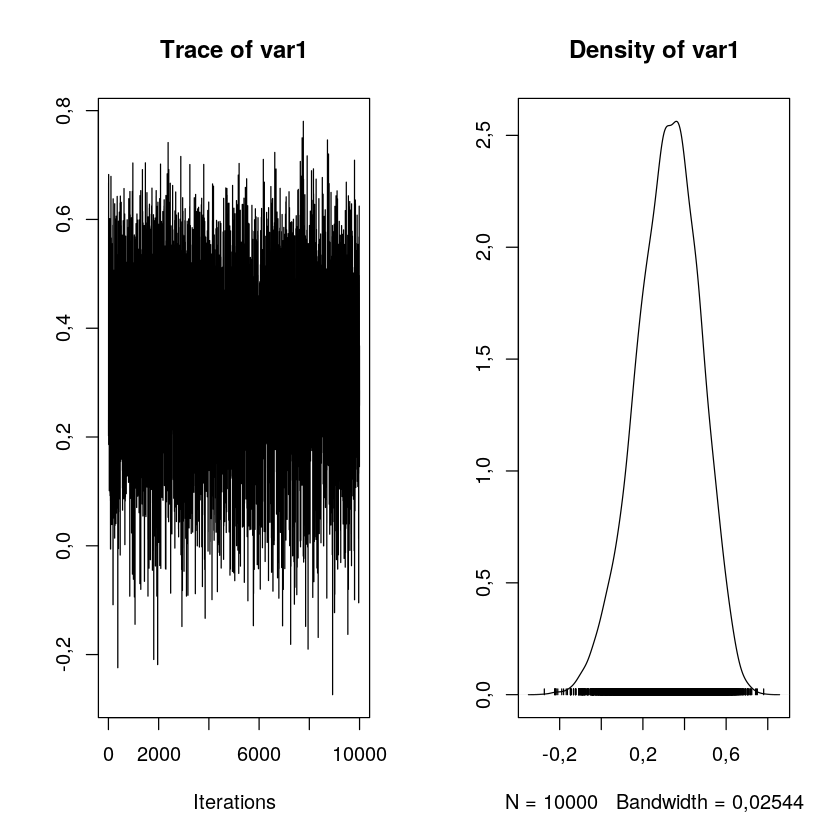

[1] 0,3059368

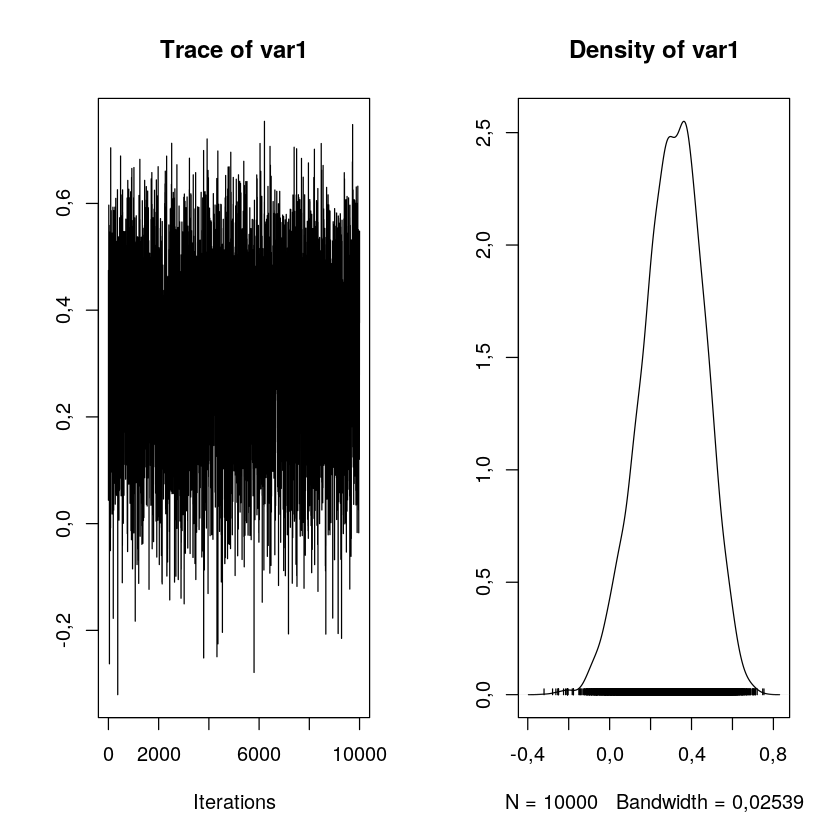

In [11]:
data1 = read.csv(paste(filepath, "/exp1_fam_obj_part_m.csv", sep=""), header=FALSE, sep=" ")
correlationBF(y = data1$V1, x =  data1$V2)
samples = correlationBF(y = data1$V1, x =  data1$V2,
          posterior = TRUE, iterations = 10000)
plot(samples[,"rho"])
mean(samples[,"rho"])

data2 = read.csv(paste(filepath, "/exp1_fam_obj_part_r.csv", sep=""), header=FALSE, sep=" ")
correlationBF(y = data2$V1, x =  data2$V2)
samples = correlationBF(y = data2$V1, x =  data2$V2,
          posterior = TRUE, iterations = 10000)
plot(samples[,"rho"])
mean(samples[,"rho"])



# Main experiment and repliction together


	One Sample t-test

data:  data_all$V1
t = 1,9288, df = 59, p-value = 0,05857
alternative hypothesis: true mean is not equal to 0,5
95 percent confidence interval:
 0,4982838 0,5933829
sample estimates:
mean of x 
0,5458333 


Bayes factor analysis
--------------
[1] Alt., r=0,707 : 0,7969278 ±0%

Against denominator:
  Null, mu = 0,5 
---
Bayes factor type: BFoneSample, JZS



	One Sample t-test

data:  data_all$V2
t = 4,9695, df = 59, p-value = 6,087e-06
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0,03577857 0,08401310
sample estimates:
 mean of x 
0,05989583 


Bayes factor analysis
--------------
[1] Alt., r=0,707 : 2907,178 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS


[1] -0,6415626

Bayes factor analysis
--------------
[1] Alt., r=0,333 : 23,93296 ±0%

Against denominator:
  Null, rho = 0 
---
Bayes factor type: BFcorrelation, Jeffreys-beta*


Independent-candidate M-H acceptance rate: 83%


[1] 0,3556017

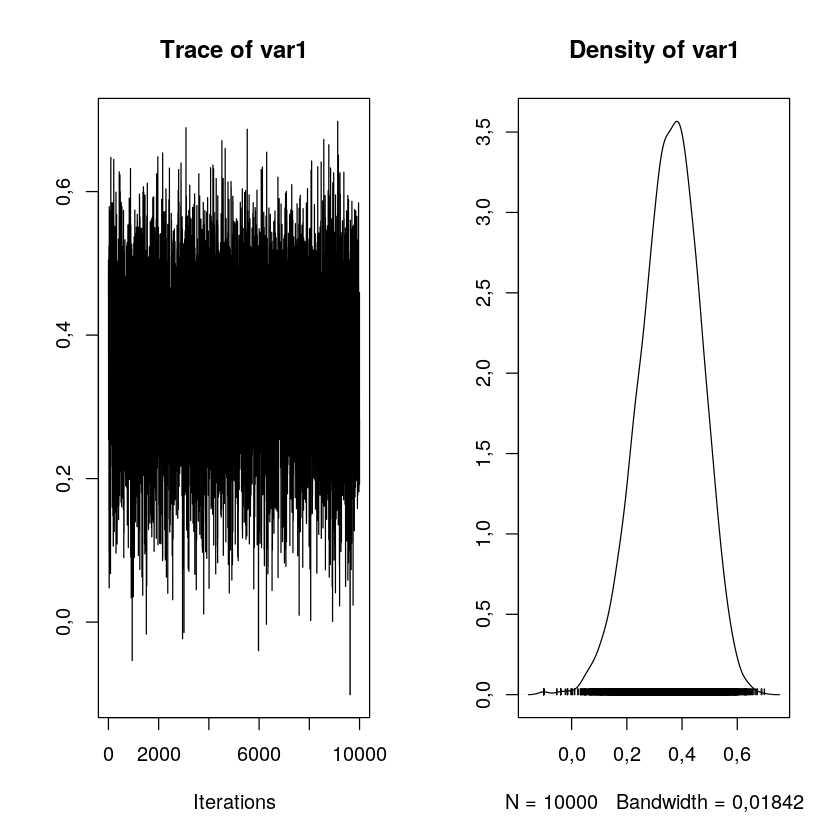

In [12]:
data1 = read.csv(paste(filepath, "/exp1_fam_obj_m.csv", sep=""), header=FALSE, sep=" ")
data2 = read.csv(paste(filepath, "/exp1_fam_obj_r.csv", sep=""), header=FALSE, sep=" ")
data_all = rbind(data1,data2)
t.test(data_all$V1, mu=0.5)
ttestBF(data_all$V1, mu=0.5,r=rscale)
t.test(data_all$V2, mu=0)
ttestBF(data_all$V2, mu=0,r=rscale)
(0-mean(data_all$V2)) / sd(data_all$V2)

correlationBF(y = data_all$V1, x =  data_all$V2)
samples = correlationBF(y = data_all$V1, x =  data_all$V2,
          posterior = TRUE, iterations = 10000)
plot(samples[,"rho"])
mean(samples[,"rho"])


	One Sample t-test

data:  data_all$V1
t = 1,9288, df = 59, p-value = 0,05857
alternative hypothesis: true mean is not equal to 0,5
95 percent confidence interval:
 0,4982838 0,5933829
sample estimates:
mean of x 
0,5458333 


Bayes factor analysis
--------------
[1] Alt., r=0,707 : 0,7969278 ±0%

Against denominator:
  Null, mu = 0,5 
---
Bayes factor type: BFoneSample, JZS



	One Sample t-test

data:  data_all$V2
t = 3,7701, df = 59, p-value = 0,0003797
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0,03030570 0,09886097
sample estimates:
 mean of x 
0,06458333 


Bayes factor analysis
--------------
[1] Alt., r=0,707 : 64,31312 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS


[1] -0,486721

Bayes factor analysis
--------------
[1] Alt., r=0,333 : 5,734435 ±0%

Against denominator:
  Null, rho = 0 
---
Bayes factor type: BFcorrelation, Jeffreys-beta*


Independent-candidate M-H acceptance rate: 86%


[1] 0,2953959

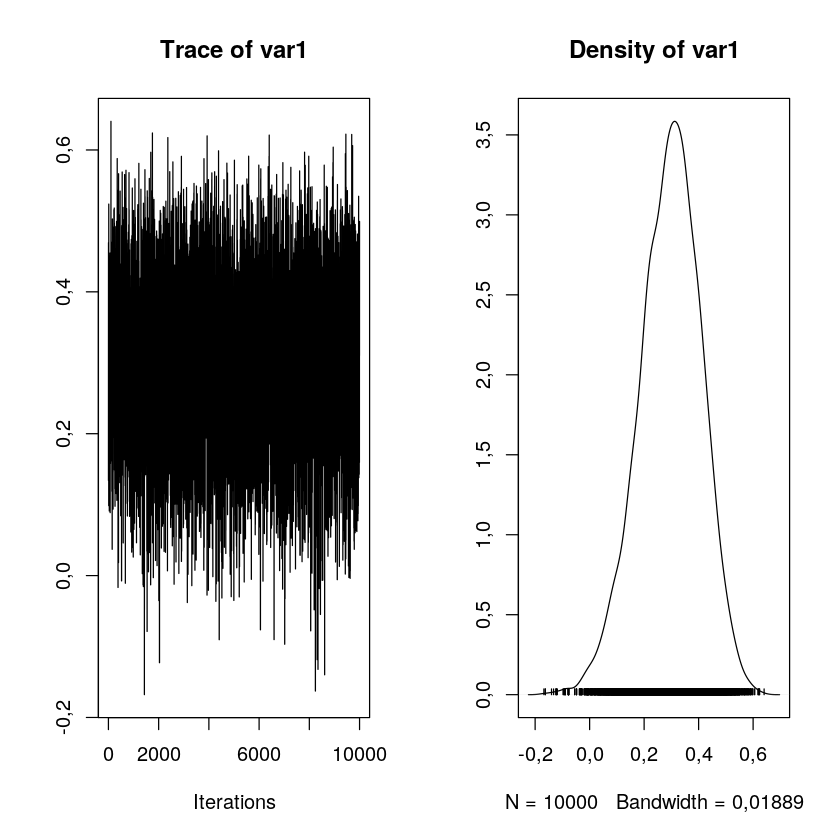

In [13]:
data1 = read.csv(paste(filepath, "/exp1_fam_obj_m1.csv", sep=""), header=FALSE, sep=" ")
data2 = read.csv(paste(filepath, "/exp1_fam_obj_r1.csv", sep=""), header=FALSE, sep=" ")
data_all = rbind(data1,data2)
t.test(data_all$V1, mu=0.5)
ttestBF(data_all$V1, mu=0.5,r=rscale)
t.test(data_all$V2, mu=0)
ttestBF(data_all$V2, mu=0,r=rscale)
(0-mean(data_all$V2)) / sd(data_all$V2)

correlationBF(y = data_all$V1, x =  data_all$V2)
samples = correlationBF(y = data_all$V1, x =  data_all$V2,
          posterior = TRUE, iterations = 10000)
plot(samples[,"rho"])
mean(samples[,"rho"])

# Comparing average RT and errors in the 4 blocks

# Errors

In [14]:
for (i in 1:3) {
    if (i == 1){
    name = 'm'
    exp = 'Main Experiment'
  } else if (i == 2) {
    name = 'r'
    exp = 'Replication Experiment'
    } else if (i == 3) {
    name = 'c'
    exp = 'Control Experiment'
    }
data = read.csv(paste(filepath, "/exp1_avg_err_",name,".csv", sep=""), header=FALSE, sep=" ")

fprintf(exp)
fprintf('\n')
fprintf('Post-Hoc comparisons:')
c1=rowMeans(cbind(data$V1,data$V2))
c2=rowMeans(cbind(data$V3,data$V4))
print(t.test(c1,c2,paired=TRUE))
print(ttestBF(x=c1,y=c2,r=rscale,paired=TRUE))
fprintf('\n')


    if (i == 2) {
        
rt <- c(data$V1,data$V2,data$V3,data$V4)
n <- length(data$V1)
blk <- factor(c(rep(1,n*2),rep(2,n*2)))
c <- factor(c(rep(1,n),rep(2,n),rep(1,n),rep(2,n)))
N <- factor(c(c(1:n),c(1:n),c(1:n),c(1:n)))
df <- data.frame(name=N,block=blk, cond=c, rt=rt)
        
    } else {

c3=rowMeans(cbind(data$V5,data$V6))
c4=rowMeans(cbind(data$V7,data$V8))

print(t.test(c1,c3,paired=TRUE))
print(ttestBF(x=c1,y=c3,r=rscale,paired=TRUE))

print(t.test(c1,c4,paired=TRUE))
print(ttestBF(x=c1,y=c4,r=rscale,paired=TRUE))
        
rt <- c(data$V1,data$V2,data$V3,data$V4,data$V5,data$V6,data$V7,data$V8)
n <- length(data$V1)
blk <- factor(c(rep(1,n*2),rep(2,n*2),rep(3,n*2),rep(4,n*2)))
c <- factor(c(rep(1,n),rep(2,n),rep(1,n),rep(2,n),c(rep(1,n),rep(2,n),rep(1,n),rep(2,n))))
N <- factor(c(c(1:n),c(1:n),c(1:n),c(1:n),c(1:n),c(1:n),c(1:n),c(1:n)))
df <- data.frame(name=N,block=blk, cond=c, rt=rt)
} 
    
fprintf('ANOVA:')
modelAOV <- aov(rt~block*cond+Error(name), data = df)
print(summary(modelAOV))

bf = anovaBF(rt~block*cond+name, data = df,  whichRandom="name")
print(bf)
    
fprintf('----------------------------------------------------------')
fprintf('\n')
}

Main Experiment
Post-Hoc comparisons:
	Paired t-test

data:  c1 and c2
t = 3,3815, df = 29, p-value = 0,002078
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  4,459311 18,110134
sample estimates:
mean of the differences 
               11,28472 

Bayes factor analysis
--------------
[1] Alt., r=0,707 : 17,42314 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS



	Paired t-test

data:  c1 and c3
t = 4,5403, df = 29, p-value = 9,083e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  9,302097 24,552070
sample estimates:
mean of the differences 
               16,92708 

Bayes factor analysis
--------------
[1] Alt., r=0,707 : 283,1019 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS


	Paired t-test

data:  c1 and c4
t = 4,4104, df = 29, p-value = 0,00013
alternative hypothesis: true difference in means is not equal to

Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”

          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 29   6920   238,6               

Error: Within


Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”

           Df Sum Sq Mean Sq F value   Pr(>F)    
block       1 2287,8  2287,8  66,586 2,34e-12 ***
cond        1   92,2    92,2   2,685   0,1049    
block:cond  1  234,4   234,4   6,822   0,0106 *  
Residuals  87 2989,2    34,4                     
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1
Bayes factor analysis
--------------
[1] block + name                     : 681075969  ±0,99%
[2] cond + name                      : 0,3702526  ±0,85%
[3] block + cond + name              : 404051776  ±2,41%
[4] block + cond + block:cond + name : 1689160176 ±2,01%

Against denominator:
  rt ~ name 
---
Bayes factor type: BFlinearModel, JZS

----------------------------------------------------------
Control Experiment
Post-Hoc comparisons:
	Paired t-test

data:  c1 and c2
t = 3,3338, df = 19, p-value = 0,003489
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1,531383 6,697783
sample estimates:
mean of the differences 
      

Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”

          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 19   3898   205,2               

Error: Within


Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”

            Df Sum Sq Mean Sq F value   Pr(>F)    
block        3  822,2   274,1  11,772 6,89e-07 ***
cond         1  630,9   630,9  27,097 7,16e-07 ***
block:cond   3  337,8   112,6   4,836  0,00316 ** 
Residuals  133 3096,4    23,3                     
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1
Bayes factor analysis
--------------
[1] block + name                     : 1534,789  ±0,93%
[2] cond + name                      : 1416,022  ±0,85%
[3] block + cond + name              : 13129628  ±2,95%
[4] block + cond + block:cond + name : 150622470 ±1,14%

Against denominator:
  rt ~ name 
---
Bayes factor type: BFlinearModel, JZS

----------------------------------------------------------


## Post hoc analysis for the 3-4 block for main and control exps

In [15]:
for (i in 1:2) {
    if (i == 1){
    name = 'm'
    exp = 'Main Experiment'
  } else if (i == 33) {
    name = 'r'
    exp = 'Replication Experiment'
    } else if (i == 2) {
    name = 'c'
    exp = 'Control Experiment'
    }
data = read.csv(paste(filepath, "/exp1_avg_err_",name,".csv", sep=""), header=FALSE, sep=" ")

fprintf(exp)
fprintf('\n')
fprintf('Post-Hoc comparisons:')
c1=rowMeans(cbind(data$V5,data$V6))
c2=rowMeans(cbind(data$V3,data$V4))
print(t.test(c1,c2,paired=TRUE))
print(ttestBF(x=c1,y=c2,r=rscale,paired=TRUE))
c3=rowMeans(cbind(data$V5,data$V6))
c4=rowMeans(cbind(data$V7,data$V8))
print(t.test(c4,c3,paired=TRUE))
print(ttestBF(x=c4,y=c3,r=rscale,paired=TRUE))
fprintf('\n')
 
rt <- c(data$V3,data$V4,data$V5,data$V6,data$V7,data$V8)
n <- length(data$V1)
blk <- factor(c(rep(1,n*2),rep(2,n*2),rep(3,n*2)))
c <- factor(c(rep(1,n),rep(2,n),rep(1,n),rep(2,n),c(rep(1,n),rep(2,n))))
N <- factor(c(c(1:n),c(1:n),c(1:n),c(1:n),c(1:n),c(1:n)))
df <- data.frame(name=N,block=blk, cond=c, rt=rt)
    
fprintf('ANOVA:')
modelAOV <- aov(rt~block*cond+Error(name), data = df)
print(summary(modelAOV))

bf = anovaBF(rt~block*cond+name, data = df,  whichRandom="name")
print(bf)
    
fprintf('----------------------------------------------------------')
fprintf('\n')
}

Main Experiment
Post-Hoc comparisons:
	Paired t-test

data:  c1 and c2
t = -3,1469, df = 29, p-value = 0,003799
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -9,309388 -1,975334
sample estimates:
mean of the differences 
              -5,642361 

Bayes factor analysis
--------------
[1] Alt., r=0,707 : 10,31413 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS


	Paired t-test

data:  c4 and c3
t = 0,42819, df = 29, p-value = 0,6717
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1,442414  2,206303
sample estimates:
mean of the differences 
              0,3819444 

Bayes factor analysis
--------------
[1] Alt., r=0,707 : 0,211623 ±0,01%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS


ANOVA:
Error: name
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 29  31591    1089               

Error: Within


Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”

            Df Sum Sq Mean Sq F value   Pr(>F)    
block        2   1193   596,5  12,597 9,03e-06 ***
cond         1      2     1,5   0,033    0,857    
block:cond   2     70    34,8   0,734    0,482    
Residuals  145   6867    47,4                     
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1
Bayes factor analysis
--------------
[1] block + name                     : 2150,501  ±0,97%
[2] cond + name                      : 0,1605345 ±1,01%
[3] block + cond + name              : 345,7925  ±1,71%
[4] block + cond + block:cond + name : 61,45972  ±2,03%

Against denominator:
  rt ~ name 
---
Bayes factor type: BFlinearModel, JZS

----------------------------------------------------------
Control Experiment
Post-Hoc comparisons:
	Paired t-test

data:  c1 and c2
t = 0,80508, df = 19, p-value = 0,4307
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1,541449  3,468533
sample estimates:
mean of the differences 
    

Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”

          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 19   2778   146,2               

Error: Within


Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”

           Df Sum Sq Mean Sq F value  Pr(>F)   
block       2  208,6  104,28   5,389 0,00607 **
cond        1  174,7  174,71   9,029 0,00340 **
block:cond  2   46,5   23,23   1,200 0,30557   
Residuals  95 1838,2   19,35                   
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1
Bayes factor analysis
--------------
[1] block + name                     : 4,379863 ±0,87%
[2] cond + name                      : 7,241031 ±1,33%
[3] block + cond + name              : 46,19136 ±4,98%
[4] block + cond + block:cond + name : 14,75246 ±2,24%

Against denominator:
  rt ~ name 
---
Bayes factor type: BFlinearModel, JZS

----------------------------------------------------------


## RTs

In [16]:
 for (i in 1:3) {
    if (i == 1){
    name = 'm'
    exp = 'Main Experiment'
  } else if (i == 2) {
    name = 'r'
    exp = 'Replication Experiment'
    } else if (i == 3) {
    name = 'c'
    exp = 'Control Experiment'
    }
data = read.csv(paste(filepath, "/exp1_avg_rt_",name,".csv", sep=""), header=FALSE, sep=" ")

fprintf(exp)
fprintf('\n')
fprintf('Post-Hoc comparisons:')
c1=rowMeans(cbind(data$V1,data$V2))
c2=rowMeans(cbind(data$V3,data$V4))
print(t.test(c1,c2,paired=TRUE))
print(ttestBF(x=c1,y=c2,r=rscale,paired=TRUE))
fprintf('\n')


    if (i == 2) {
        
rt <- c(data$V1,data$V2,data$V3,data$V4)
n <- length(data$V1)
blk <- factor(c(rep(1,n*2),rep(2,n*2)))
c <- factor(c(rep(1,n),rep(2,n),rep(1,n),rep(2,n)))
N <- factor(c(c(1:n),c(1:n),c(1:n),c(1:n)))
df <- data.frame(name=N,block=blk, cond=c, rt=rt)
        
    } else {

c3=rowMeans(cbind(data$V5,data$V6))
c4=rowMeans(cbind(data$V7,data$V8))

print(t.test(c1,c3,paired=TRUE))
print(ttestBF(x=c1,y=c3,r=rscale,paired=TRUE))

print(t.test(c1,c4,paired=TRUE))
print(ttestBF(x=c1,y=c4,r=rscale,paired=TRUE))
        
rt <- c(data$V1,data$V2,data$V3,data$V4,data$V5,data$V6,data$V7,data$V8)
n <- length(data$V1)
blk <- factor(c(rep(1,n*2),rep(2,n*2),rep(3,n*2),rep(4,n*2)))
c <- factor(c(rep(1,n),rep(2,n),rep(1,n),rep(2,n),c(rep(1,n),rep(2,n),rep(1,n),rep(2,n))))
N <- factor(c(c(1:n),c(1:n),c(1:n),c(1:n),c(1:n),c(1:n),c(1:n),c(1:n)))
df <- data.frame(name=N,block=blk, cond=c, rt=rt)
} 
    
fprintf('ANOVA:')
modelAOV <- aov(rt~block*cond+Error(name), data = df)
print(summary(modelAOV))

bf = anovaBF(rt~block*cond+name, data = df,  whichRandom="name")
print(bf)
    
fprintf('----------------------------------------------------------')
fprintf('\n')
}

Main Experiment
Post-Hoc comparisons:
	Paired t-test

data:  c1 and c2
t = 6,8825, df = 29, p-value = 1,462e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 195,7234 361,2309
sample estimates:
mean of the differences 
               278,4771 

Bayes factor analysis
--------------
[1] Alt., r=0,707 : 105353,7 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS



	Paired t-test

data:  c1 and c3
t = 7,5104, df = 29, p-value = 2,807e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 280,3499 490,1796
sample estimates:
mean of the differences 
               385,2648 

Bayes factor analysis
--------------
[1] Alt., r=0,707 : 492787 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS


	Paired t-test

data:  c1 and c4
t = 8,1804, df = 29, p-value = 5,087e-09
alternative hypothesis: true difference in means is not equal to 0


## Post hoc analysis for the 3-4 block for main and control exps

In [17]:
for (i in 1:3) {
    if (i == 1){
    name = 'm'
    exp = 'Main Experiment'
  } else if (i == 33) {
    name = 'r'
    exp = 'Replication Experiment'
    } else if (i == 3) {
    name = 'c'
    exp = 'Control Experiment'
    }
data = read.csv(paste(filepath, "/exp1_avg_err_",name,".csv", sep=""), header=FALSE, sep=" ")

fprintf(exp)
fprintf('\n')
fprintf('Post-Hoc comparisons:')
c1=rowMeans(cbind(data$V5,data$V6))
c2=rowMeans(cbind(data$V3,data$V4))
print(t.test(c1,c2,paired=TRUE))
print(ttestBF(x=c1,y=c2,r=rscale,paired=TRUE))
c3=rowMeans(cbind(data$V5,data$V6))
c4=rowMeans(cbind(data$V7,data$V8))
print(t.test(c4,c3,paired=TRUE))
print(ttestBF(x=c4,y=c3,r=rscale,paired=TRUE))
fprintf('\n')
 
rt <- c(data$V3,data$V4,data$V5,data$V6,data$V7,data$V8)
n <- length(data$V1)
blk <- factor(c(rep(1,n*2),rep(2,n*2),rep(3,n*2)))
c <- factor(c(rep(1,n),rep(2,n),rep(1,n),rep(2,n),c(rep(1,n),rep(2,n))))
N <- factor(c(c(1:n),c(1:n),c(1:n),c(1:n),c(1:n),c(1:n)))
df <- data.frame(name=N,block=blk, cond=c, rt=rt)
    
fprintf('ANOVA:')
modelAOV <- aov(rt~block*cond+Error(name), data = df)
print(summary(modelAOV))

bf = anovaBF(rt~block*cond+name, data = df,  whichRandom="name")
print(bf)
    
fprintf('----------------------------------------------------------')
fprintf('\n')
}

Main Experiment
Post-Hoc comparisons:
	Paired t-test

data:  c1 and c2
t = -3,1469, df = 29, p-value = 0,003799
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -9,309388 -1,975334
sample estimates:
mean of the differences 
              -5,642361 

Bayes factor analysis
--------------
[1] Alt., r=0,707 : 10,31413 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS


	Paired t-test

data:  c4 and c3
t = 0,42819, df = 29, p-value = 0,6717
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1,442414  2,206303
sample estimates:
mean of the differences 
              0,3819444 

Bayes factor analysis
--------------
[1] Alt., r=0,707 : 0,211623 ±0,01%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS


ANOVA:
Error: name
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 29  31591    1089               

Error: Within


Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”

            Df Sum Sq Mean Sq F value   Pr(>F)    
block        2   1193   596,5  12,597 9,03e-06 ***
cond         1      2     1,5   0,033    0,857    
block:cond   2     70    34,8   0,734    0,482    
Residuals  145   6867    47,4                     
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1
Bayes factor analysis
--------------
[1] block + name                     : 2178,556  ±0,9%
[2] cond + name                      : 0,1635388 ±2,14%
[3] block + cond + name              : 355,544   ±1,85%
[4] block + cond + block:cond + name : 64,10899  ±3,07%

Against denominator:
  rt ~ name 
---
Bayes factor type: BFlinearModel, JZS

----------------------------------------------------------
Main Experiment
Post-Hoc comparisons:
	Paired t-test

data:  c1 and c2
t = -3,1469, df = 29, p-value = 0,003799
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -9,309388 -1,975334
sample estimates:
mean of the differences 
      

Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”

            Df Sum Sq Mean Sq F value   Pr(>F)    
block        2   1193   596,5  12,597 9,03e-06 ***
cond         1      2     1,5   0,033    0,857    
block:cond   2     70    34,8   0,734    0,482    
Residuals  145   6867    47,4                     
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1
Bayes factor analysis
--------------
[1] block + name                     : 2147,756  ±0,86%
[2] cond + name                      : 0,1604859 ±0,92%
[3] block + cond + name              : 357,2694  ±1,61%
[4] block + cond + block:cond + name : 62,42335  ±4,73%

Against denominator:
  rt ~ name 
---
Bayes factor type: BFlinearModel, JZS

----------------------------------------------------------
Control Experiment
Post-Hoc comparisons:
	Paired t-test

data:  c1 and c2
t = 0,80508, df = 19, p-value = 0,4307
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1,541449  3,468533
sample estimates:
mean of the differences 
    

Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”

          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 19   2778   146,2               

Error: Within


Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”

           Df Sum Sq Mean Sq F value  Pr(>F)   
block       2  208,6  104,28   5,389 0,00607 **
cond        1  174,7  174,71   9,029 0,00340 **
block:cond  2   46,5   23,23   1,200 0,30557   
Residuals  95 1838,2   19,35                   
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1
Bayes factor analysis
--------------
[1] block + name                     : 4,425395 ±0,83%
[2] cond + name                      : 7,234506 ±1,03%
[3] block + cond + name              : 44,34147 ±1,24%
[4] block + cond + block:cond + name : 14,14003 ±1,22%

Against denominator:
  rt ~ name 
---
Bayes factor type: BFlinearModel, JZS

----------------------------------------------------------
